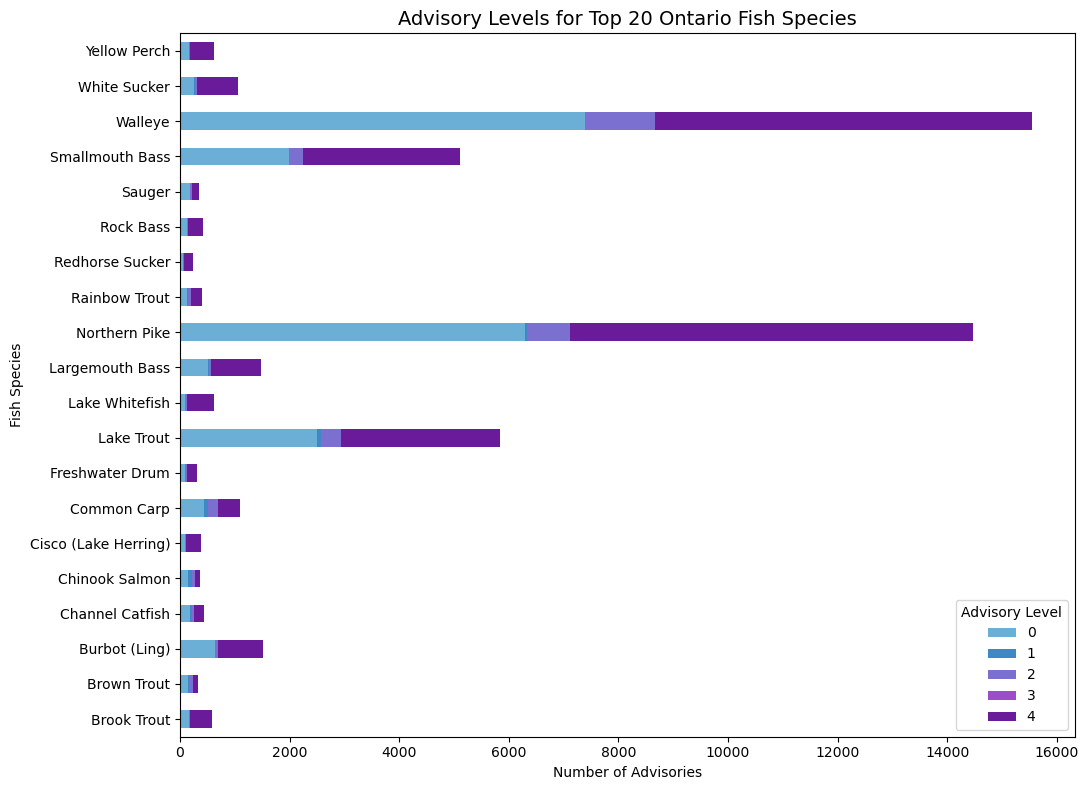

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Load the CSV locally
# -----------------------------
df = pd.read_csv("Guide_to_Eating_Ontario_Fish_Advisory_Database_2024.csv", encoding="latin1")

# -----------------------------
# Step 2: Clean and prep
# -----------------------------
df = df.dropna(subset=["Specname", "Adv Level"])
df["Adv Level"] = pd.to_numeric(df["Adv Level"], errors="coerce")
df = df[df["Adv Level"].between(0, 4)]

# -----------------------------
# Step 3: Top 20 species
# -----------------------------
top_species = df["Specname"].value_counts().nlargest(20).index
df_top = df[df["Specname"].isin(top_species)]

# -----------------------------
# Step 4: Pivot for stacked bar
# -----------------------------
pivot = df_top.pivot_table(index="Specname", columns="Adv Level", aggfunc="size", fill_value=0)
pivot = pivot.reindex(columns=[0, 1, 2, 3, 4], fill_value=0)

# -----------------------------
# Step 5: Custom color palette
# -----------------------------
color_map = {
    0: "#6baed6",  # light blue
    1: "#3f88c5",  # bolder blue
    2: "#7b6fd0",  # lavender-violet
    3: "#9b4dca",  # purple
    4: "#6a1b9a"   # deep plum
}

# -----------------------------
# Step 6: Plot!
# -----------------------------
ax = pivot.plot(
    kind="barh",
    stacked=True,
    color=[color_map.get(level, "#cccccc") for level in pivot.columns],
    figsize=(11, 8)
)

plt.title("Advisory Levels for Top 20 Ontario Fish Species", fontsize=14)
plt.xlabel("Number of Advisories")
plt.ylabel("Fish Species")
plt.legend(title="Advisory Level", loc="lower right")
plt.tight_layout()

# Save if needed
# plt.savefig("ontario_fish_advisory_levels.png", dpi=300)

plt.show()
